In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.optimizers import SGD,Adam
from keras.utils import to_categorical


import warnings
warnings.filterwarnings('ignore')



Using TensorFlow backend.


In [26]:
full_df = pd.read_csv('data/survey_results_public.csv')

In [27]:
list(full_df)

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

In [46]:
df = full_df.loc[:,[
    'Respondent',
    'Country',
    'Employment',
    'FormalEducation',
    'CompanySize',
    'DevType',
    'YearsCodingProf',
    'ConvertedSalary',
    'Age',
]]

### Clean Up Data

#### Look at data to find categories and multivalues.

In [47]:
for col in df.columns:
    print('Column: {} | Values: {}'.format(col, df[col].unique()))

Column: Respondent | Values: [     1      3      4 ... 101541 101544 101548]
Column: Country | Values: ['Kenya' 'United Kingdom' 'United States' 'South Africa' 'Nigeria' 'India'
 'Spain' 'Croatia' 'Netherlands' 'Israel' 'Sweden' 'Chile' 'Australia'
 'Greece' 'Poland' 'Belgium' 'Argentina' 'Germany' 'Russian Federation'
 'Indonesia' 'Ireland' 'France' 'Ukraine' 'Denmark' 'Dominican Republic'
 'China' 'Latvia' 'Algeria' 'Colombia' 'Japan' 'Finland' 'Romania'
 'Brazil' 'Bulgaria' 'Iran, Islamic Republic of...' 'Nepal' 'Bangladesh'
 'Pakistan' 'Canada' 'Jordan' 'Portugal' 'Italy' 'New Zealand' 'Turkey'
 'Czech Republic' 'Viet Nam' 'Austria' 'Egypt' 'Malaysia' 'Mozambique'
 'Thailand' 'Slovakia' 'Lebanon' 'Mexico' 'Hong Kong (S.A.R.)' 'Norway'
 'Myanmar' 'Switzerland' 'South Korea' 'Hungary' 'Armenia' 'Kazakhstan'
 'United Arab Emirates' 'Singapore' 'Qatar' 'Bosnia and Herzegovina'
 'Bahrain' 'Sri Lanka' 'Cambodia' 'Serbia' 'Philippines' 'Peru' 'Botswana'
 'Paraguay' 'Georgia' 'Uruguay' 'Be

### Create So many Categories

In [48]:
df['Employment'] = df['Employment'].astype(CategoricalDtype([
    'Retired',
    'Not employed, and not looking for work',
    'Not employed, but looking for work',
    'Employed part-time',
    'Independent contractor, freelancer, or self-employed',
    'Employed full-time'   
], ordered=True))

df['FormalEducation'] = df['FormalEducation'].astype(CategoricalDtype([
    'I never completed any formal education',
    'Primary/elementary school',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'Associate degree',
    'Some college/university study without earning a degree',
    'Bachelor’s degree (BA, BS, B.Eng., etc.)',
    'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
    'Professional degree (JD, MD, etc.)',
    'Other doctoral degree (Ph.D, Ed.D., etc.)'  
], ordered=True))


df['CompanySize'] = df['CompanySize'].astype(CategoricalDtype([
    'Fewer than 10 employees',
    '10 to 19 employees',
    '20 to 99 employees', 
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees'
], ordered=True))



df['YearsCodingProf'] = df['YearsCodingProf'].astype(CategoricalDtype([
    '0-2 years',
    '3-5 years',
    '6-8 years',
    '9-11 years',
    '12-14 years',
    '15-17 years',
    '18-20 years',
    '21-23 years',
    '24-26 years',
    '27-29',
    '30 or more years'
], ordered=True))


df['Age'] = df['Age'].astype(CategoricalDtype([
    'Under 18 years old',
    '18 - 24 years old',
    '25 - 34 years old',
    '35 - 44 years old', 
    '45 - 54 years old',
    '55 - 64 years old', 
    '65 years or older'
], ordered=True))

df['Country'] = df['Country'].astype('category')

#### Now, turn all categories into ints

In [49]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['Country', 'Employment', 'FormalEducation', 'CompanySize',
       'YearsCodingProf', 'Age'],
      dtype='object')

In [50]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 9 columns):
Respondent         98855 non-null int64
Country            98855 non-null int16
Employment         98855 non-null int8
FormalEducation    98855 non-null int8
CompanySize        98855 non-null int8
DevType            92098 non-null object
YearsCodingProf    98855 non-null int8
ConvertedSalary    47702 non-null float64
Age                98855 non-null int8
dtypes: float64(1), int16(1), int64(1), int8(5), object(1)
memory usage: 2.9+ MB


In [52]:
df.head()

,Respondent,Country,Employment,FormalEducation,CompanySize,DevType,YearsCodingProf,ConvertedSalary,Age
0,1,85,3,5,2,Full-stack developer,1,NaN,2
1,3,173,5,5,7,Database administrator;DevOps specialist;Full-...,6,70841.0,3
2,4,175,5,3,2,Engineering manager;Full-stack developer,2,NaN,-1
3,5,175,5,5,3,Full-stack developer,4,NaN,3
4,7,150,5,4,7,Data or business analyst;Desktop or enterprise...,0,21426.0,1


### Drop Salary NaNs and Outliers

In [53]:
df.dropna(subset=['ConvertedSalary'], inplace=True)

In [54]:
q1 = df['ConvertedSalary'].quantile(0.25)
q3 = df['ConvertedSalary'].quantile(0.75)
IQR = q3 - q1


ub = df['ConvertedSalary'] <= (q3 + (1.5 * IQR))

df = df[ub]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Data columns (total 9 columns):
Respondent         45069 non-null int64
Country            45069 non-null int16
Employment         45069 non-null int8
FormalEducation    45069 non-null int8
CompanySize        45069 non-null int8
DevType            44760 non-null object
YearsCodingProf    45069 non-null int8
ConvertedSalary    45069 non-null float64
Age                45069 non-null int8
dtypes: float64(1), int16(1), int64(1), int8(5), object(1)
memory usage: 1.7+ MB


### Create Dummy Variables for Multi-response answer

In [56]:
DevType_dummies = pd.get_dummies(df['DevType'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_devtype').sum(level=0)


In [57]:
x_df = df
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Data columns (total 9 columns):
Respondent         45069 non-null int64
Country            45069 non-null int16
Employment         45069 non-null int8
FormalEducation    45069 non-null int8
CompanySize        45069 non-null int8
DevType            44760 non-null object
YearsCodingProf    45069 non-null int8
ConvertedSalary    45069 non-null float64
Age                45069 non-null int8
dtypes: float64(1), int16(1), int64(1), int8(5), object(1)
memory usage: 2.9+ MB


In [58]:
x_df = pd.concat([x_df, DevType_dummies], axis=1)

x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Data columns (total 29 columns):
Respondent                                                   45069 non-null int64
Country                                                      45069 non-null int16
Employment                                                   45069 non-null int8
FormalEducation                                              45069 non-null int8
CompanySize                                                  45069 non-null int8
DevType                                                      44760 non-null object
YearsCodingProf                                              45069 non-null int8
ConvertedSalary                                              45069 non-null float64
Age                                                          45069 non-null int8
var_devtype_Back-end developer                               44760 non-null float64
var_devtype_C-suite executive (CEO, CTO, etc.)               44760 non-

In [59]:
x_df = x_df.drop([
    'DevType',
], axis=1)

x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Data columns (total 28 columns):
Respondent                                                   45069 non-null int64
Country                                                      45069 non-null int16
Employment                                                   45069 non-null int8
FormalEducation                                              45069 non-null int8
CompanySize                                                  45069 non-null int8
YearsCodingProf                                              45069 non-null int8
ConvertedSalary                                              45069 non-null float64
Age                                                          45069 non-null int8
var_devtype_Back-end developer                               44760 non-null float64
var_devtype_C-suite executive (CEO, CTO, etc.)               44760 non-null float64
var_devtype_Data or business analyst                         44760 non

### Add new column for converted salary bins 

In [60]:
x_df['SalaryBins'] = pd.qcut(x_df["ConvertedSalary"], 4, labels=False)
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Data columns (total 29 columns):
Respondent                                                   45069 non-null int64
Country                                                      45069 non-null int16
Employment                                                   45069 non-null int8
FormalEducation                                              45069 non-null int8
CompanySize                                                  45069 non-null int8
YearsCodingProf                                              45069 non-null int8
ConvertedSalary                                              45069 non-null float64
Age                                                          45069 non-null int8
var_devtype_Back-end developer                               44760 non-null float64
var_devtype_C-suite executive (CEO, CTO, etc.)               44760 non-null float64
var_devtype_Data or business analyst                         44760 non

In [19]:
x_df['SalaryBins']

1        2
4        0
5        1
6        3
14       0
17       1
20       3
22       0
23       2
24       0
25       1
26       2
30       1
32       1
33       2
35       2
41       3
42       0
43       2
45       0
46       3
47       2
49       3
51       3
53       2
56       3
57       0
62       3
63       1
65       0
        ..
89796    0
89806    0
89815    0
89816    0
89820    0
89832    0
89835    0
89839    3
89846    0
89853    0
89859    0
89871    0
89874    0
89888    0
89896    0
89898    0
89904    0
89911    0
89913    1
89922    0
89925    0
89926    0
89929    0
89932    3
89938    0
89941    0
89946    0
89954    0
89960    0
89965    0
Name: SalaryBins, Length: 45069, dtype: int64

In [62]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Data columns (total 29 columns):
Respondent                                                   45069 non-null int64
Country                                                      45069 non-null int16
Employment                                                   45069 non-null int8
FormalEducation                                              45069 non-null int8
CompanySize                                                  45069 non-null int8
YearsCodingProf                                              45069 non-null int8
ConvertedSalary                                              45069 non-null float64
Age                                                          45069 non-null int8
var_devtype_Back-end developer                               44760 non-null float64
var_devtype_C-suite executive (CEO, CTO, etc.)               44760 non-null float64
var_devtype_Data or business analyst                         44760 non

### Create Dataset for Salary NN

In [63]:
dataset = x_df.values

In [64]:
dataset

array([[3.00000e+00, 1.73000e+02, 5.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 2.00000e+00],
       [7.00000e+00, 1.50000e+02, 5.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [8.00000e+00, 1.73000e+02, 5.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [1.00743e+05, 6.10000e+01, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00927e+05, 1.51000e+02, 5.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.01115e+05, 7.40000e+01, 2.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

### Create X and Y variables and split into training, val, and test sets

In [65]:
X = dataset[:,0:28]

In [66]:
Y = dataset[:,28].astype(int)

In [67]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
Y1 = encoder.fit_transform(Y)

Y = pd.get_dummies(Y1).values

In [68]:
Y

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)

In [69]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [70]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [71]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [72]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(31548, 28) (6760, 28) (6761, 28) (31548, 4) (6760, 4) (6761, 4)


### Create Salary Model

In [73]:
model = Sequential()

model.add(Dense(64, input_shape=(28,), activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(4, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [74]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1856      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 68        
Total params: 4,532
Trainable params: 4,532
Non-trainable params: 0
_________________________________________________________________


### Train the model 

In [77]:
batch_size = 50
epochs = 100

history = model.fit(X_train,
                    Y_train,
                    validation_data=(X_val, Y_val),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 31548 samples, validate on 6760 samples
Epoch 1/100
31548/31548 [==============================] - 1s 20us/step - loss: 1.3909 - acc: 0.2487 - val_loss: 1.3869 - val_acc: 0.2524
Epoch 2/100
31548/31548 [==============================] - 1s 19us/step - loss: 1.3882 - acc: 0.2451 - val_loss: 1.3869 - val_acc: 0.2524
Epoch 3/100
31548/31548 [==============================] - 1s 20us/step - loss: 1.3876 - acc: 0.2531 - val_loss: 1.3875 - val_acc: 0.2509
Epoch 4/100
31548/31548 [==============================] - 1s 20us/step - loss: 1.3875 - acc: 0.2494 - val_loss: 1.3880 - val_acc: 0.2524
Epoch 5/100
31548/31548 [==============================] - 1s 19us/step - loss: 1.3875 - acc: 0.2467 - val_loss: 1.3864 - val_acc: 0.2524
Epoch 6/100
31548/31548 [==============================] - 1s 19us/step - loss: 1.3873 - acc: 0.2465 - val_loss: 1.3874 - val_acc: 0.2481
Epoch 7/100
31548/31548 [==============================] - 1s 19us/step - loss: 1.3872 - acc: 0.2475 - val_loss: 1.3876 - v

31548/31548 [==============================] - 1s 20us/step - loss: 1.3871 - acc: 0.2528 - val_loss: 1.3865 - val_acc: 0.2524
Epoch 60/100
31548/31548 [==============================] - 1s 20us/step - loss: 1.3874 - acc: 0.2456 - val_loss: 1.3866 - val_acc: 0.2509
Epoch 61/100
31548/31548 [==============================] - 1s 19us/step - loss: 1.3869 - acc: 0.2542 - val_loss: 1.3874 - val_acc: 0.2481
Epoch 62/100
31548/31548 [==============================] - 1s 20us/step - loss: 1.3872 - acc: 0.2484 - val_loss: 1.3866 - val_acc: 0.2487
Epoch 63/100
31548/31548 [==============================] - 1s 20us/step - loss: 1.3868 - acc: 0.2519 - val_loss: 1.3879 - val_acc: 0.2487
Epoch 64/100
31548/31548 [==============================] - 1s 18us/step - loss: 1.3872 - acc: 0.2497 - val_loss: 1.3870 - val_acc: 0.2524
Epoch 65/100
31548/31548 [==============================] - 1s 18us/step - loss: 1.3870 - acc: 0.2509 - val_loss: 1.3866 - val_acc: 0.2509
Epoch 66/100
31548/31548 [==============

In [78]:
score = model.evaluate(X_test,
                       Y_test,
                       batch_size=batch_size,
                       verbose=1)

print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))

6761/6761 [==============================] - 0s 8us/step
Test loss: 1.387
Test accuracy: 0.259


In [79]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

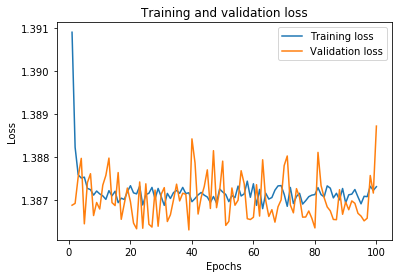

In [80]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

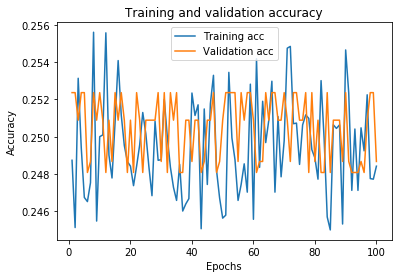

In [81]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Create NN for predicting Job Satisfaction

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Data columns (total 9 columns):
Respondent         45069 non-null int64
Country            45069 non-null int16
Employment         45069 non-null int8
FormalEducation    45069 non-null int8
CompanySize        45069 non-null int8
DevType            44760 non-null object
YearsCodingProf    45069 non-null int8
ConvertedSalary    45069 non-null float64
Age                45069 non-null int8
dtypes: float64(1), int16(1), int64(1), int8(5), object(1)
memory usage: 2.9+ MB


In [83]:
job_df = full_df.loc[:,[
    'Respondent',
    'Country',
    'FormalEducation',
    'CompanySize',
    'DevType',
    'ConvertedSalary',
    'HoursComputer',
    'HoursOutside',
    'SkipMeals',
    'Exercise',
    'JobSatisfaction'
]]

In [86]:
job_df['FormalEducation'] = job_df['FormalEducation'].astype(CategoricalDtype([
    'I never completed any formal education',
    'Primary/elementary school',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'Associate degree',
    'Some college/university study without earning a degree',
    'Bachelor’s degree (BA, BS, B.Eng., etc.)',
    'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
    'Professional degree (JD, MD, etc.)',
    'Other doctoral degree (Ph.D, Ed.D., etc.)'  
], ordered=True))


job_df['CompanySize'] = job_df['CompanySize'].astype(CategoricalDtype([
    'Fewer than 10 employees',
    '10 to 19 employees',
    '20 to 99 employees', 
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees'
], ordered=True))

job_df['HoursComputer'] = job_df['HoursComputer'].astype(CategoricalDtype([
    'Less than 1 hour',
    '1 - 4 hours',
    '5 - 8 hours',
    '9 - 12 hours', 
    'Over 12 hours' 
], ordered=True))

job_df['HoursOutside'] = job_df['HoursOutside'].astype(CategoricalDtype([
    'Less than 30 minutes',
    '30 - 59 minutes',
    '1 - 2 hours',
    '3 - 4 hours',
    'Over 4 hours'
], ordered=True))

job_df['SkipMeals'] = job_df['SkipMeals'].astype(CategoricalDtype([
    'Never',
    '1 - 2 times per week',
    '3 - 4 times per week', 
    'Daily or almost every day'
], ordered=True))

job_df['Exercise'] = job_df['Exercise'].astype(CategoricalDtype([
    "I don't typically exercise",
    '1 - 2 times per week',
    '3 - 4 times per week',
    'Daily or almost every day' 
], ordered=True))


job_df['Country'] = job_df['Country'].astype('category')

job_df['JobSatisfaction'] = job_df['JobSatisfaction'].astype(CategoricalDtype([
    'Extremely dissatisfied',
    'Moderately dissatisfied',
    'Slightly dissatisfied', 
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Moderately satisfied',
    'Extremely satisfied'    
], ordered=True))

In [87]:
cat_columns = job_df.select_dtypes(['category']).columns
cat_columns
job_df[cat_columns] = job_df[cat_columns].apply(lambda x: x.cat.codes)

In [88]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 11 columns):
Respondent         98855 non-null int64
Country            98855 non-null int16
FormalEducation    98855 non-null int8
CompanySize        98855 non-null int8
DevType            92098 non-null object
ConvertedSalary    47702 non-null float64
HoursComputer      98855 non-null int8
HoursOutside       98855 non-null int8
SkipMeals          98855 non-null int8
Exercise           98855 non-null int8
JobSatisfaction    98855 non-null int8
dtypes: float64(1), int16(1), int64(1), int8(7), object(1)
memory usage: 3.1+ MB


In [89]:
DevType_dummies = pd.get_dummies(job_df['DevType'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_devtype').sum(level=0)


In [90]:
job_df = pd.concat([job_df, DevType_dummies], axis=1)

job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98855 entries, 0 to 98854
Data columns (total 31 columns):
Respondent                                                   98855 non-null int64
Country                                                      98855 non-null int16
FormalEducation                                              98855 non-null int8
CompanySize                                                  98855 non-null int8
DevType                                                      92098 non-null object
ConvertedSalary                                              47702 non-null float64
HoursComputer                                                98855 non-null int8
HoursOutside                                                 98855 non-null int8
SkipMeals                                                    98855 non-null int8
Exercise                                                     98855 non-null int8
JobSatisfaction                                              98855 non-nul

In [91]:
job_df = job_df.drop([
    'DevType',
], axis=1)

job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98855 entries, 0 to 98854
Data columns (total 30 columns):
Respondent                                                   98855 non-null int64
Country                                                      98855 non-null int16
FormalEducation                                              98855 non-null int8
CompanySize                                                  98855 non-null int8
ConvertedSalary                                              47702 non-null float64
HoursComputer                                                98855 non-null int8
HoursOutside                                                 98855 non-null int8
SkipMeals                                                    98855 non-null int8
Exercise                                                     98855 non-null int8
JobSatisfaction                                              98855 non-null int8
var_devtype_Back-end developer                               92098 non-null 

In [92]:
print("Correlation Matrix")
print(job_df.corr())
print()

def get_redundant_pairs(job_df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = job_df.columns
    for i in range(0, job_df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(job_df, n=5):
    au_corr = job_df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(job_df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(job_df, 20))

Correlation Matrix
                                                    Respondent   Country  \
Respondent                                            1.000000 -0.001433   
Country                                              -0.001433  1.000000   
FormalEducation                                            NaN       NaN   
CompanySize                                                NaN       NaN   
ConvertedSalary                                       0.003645  0.129755   
HoursComputer                                         0.000431  0.082677   
HoursOutside                                         -0.002763 -0.001972   
SkipMeals                                            -0.001683  0.079713   
Exercise                                             -0.003467  0.093536   
JobSatisfaction                                      -0.001625  0.084599   
var_devtype_Back-end developer                       -0.001602 -0.015138   
var_devtype_C-suite executive (CEO, CTO, etc.)        0.001458 -0.007

HoursComputer                         HoursOutside                                                 0.730259
                                      SkipMeals                                                    0.664437
                                      Exercise                                                     0.645980
HoursOutside                          Exercise                                                     0.642817
                                      SkipMeals                                                    0.564234
SkipMeals                             Exercise                                                     0.460020
HoursComputer                         JobSatisfaction                                              0.431795
var_devtype_Database administrator    var_devtype_System administrator                             0.390092
JobSatisfaction                       var_devtype_Student                                          0.317684
Exercise                    

In [93]:
job_sat = job_df['JobSatisfaction']
job_df = job_df.drop([
    'JobSatisfaction'
], axis=1)
job_df = pd.concat([job_df, job_sat], axis=1)

list(job_df)

['Respondent',
 'Country',
 'FormalEducation',
 'CompanySize',
 'ConvertedSalary',
 'HoursComputer',
 'HoursOutside',
 'SkipMeals',
 'Exercise',
 'var_devtype_Back-end developer',
 'var_devtype_C-suite executive (CEO, CTO, etc.)',
 'var_devtype_Data or business analyst',
 'var_devtype_Data scientist or machine learning specialist',
 'var_devtype_Database administrator',
 'var_devtype_Designer',
 'var_devtype_Desktop or enterprise applications developer',
 'var_devtype_DevOps specialist',
 'var_devtype_Educator or academic researcher',
 'var_devtype_Embedded applications or devices developer',
 'var_devtype_Engineering manager',
 'var_devtype_Front-end developer',
 'var_devtype_Full-stack developer',
 'var_devtype_Game or graphics developer',
 'var_devtype_Marketing or sales professional',
 'var_devtype_Mobile developer',
 'var_devtype_Product manager',
 'var_devtype_QA or test developer',
 'var_devtype_Student',
 'var_devtype_System administrator',
 'JobSatisfaction']

In [114]:
job_df['JobSatisfaction'].unique()

array([ 6,  1,  5,  3,  4, -1,  2,  0])

In [94]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98855 entries, 0 to 98854
Data columns (total 30 columns):
Respondent                                                   98855 non-null int64
Country                                                      98855 non-null int16
FormalEducation                                              98855 non-null int8
CompanySize                                                  98855 non-null int8
ConvertedSalary                                              47702 non-null float64
HoursComputer                                                98855 non-null int8
HoursOutside                                                 98855 non-null int8
SkipMeals                                                    98855 non-null int8
Exercise                                                     98855 non-null int8
var_devtype_Back-end developer                               92098 non-null float64
var_devtype_C-suite executive (CEO, CTO, etc.)               92098 non-nu

### Build the Dataset for Job Satisfaction NN

In [95]:
job_dataset = job_df.values

In [98]:
jX = job_dataset[:,0:29]

In [99]:
jY = job_dataset[:,29].astype(int)

In [120]:
jY

array([ 6,  1,  5, ..., -1, -1, -1])

In [121]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
jY1 = encoder.fit_transform(jY)

jY = pd.get_dummies(jY1).values

In [122]:
jY

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [123]:
min_max_scaler = preprocessing.MinMaxScaler()
jX_scale = min_max_scaler.fit_transform(jX)

In [124]:
jX_train, jX_val_and_test, jY_train, jY_val_and_test = train_test_split(jX_scale, jY, test_size=0.3)

In [125]:
jX_val, jX_test, jY_val, jY_test = train_test_split(jX_val_and_test, jY_val_and_test, test_size=0.5)

In [126]:
print(jX_train.shape, jX_val.shape, jX_test.shape, jY_train.shape, jY_val.shape, jY_test.shape)

(69198, 29) (14828, 29) (14829, 29) (69198, 8) (14828, 8) (14829, 8)


### Build the Model for Job Satisfaction NN

In [127]:
jmodel = Sequential()

jmodel.add(Dense(64, input_shape=(29,), activation='tanh'))
jmodel.add(Dense(64, activation='tanh'))
jmodel.add(Dense(32, activation='tanh'))
jmodel.add(Dense(16, activation='tanh'))
jmodel.add(Dense(8, activation='softmax'))

In [128]:
jmodel.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [129]:
jmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 136       
Total params: 8,824
Trainable params: 8,824
Non-trainable params: 0
_________________________________________________________________


In [ ]:
jbatch_size = 50
jepochs = 100

jhistory = jmodel.fit(jX_train,
                    jY_train,
                    validation_data=(jX_val, jY_val),
                    batch_size=jbatch_size,
                    epochs=jepochs,
                    verbose=1)

Train on 69198 samples, validate on 14828 samples
Epoch 1/100
69198/69198 [==============================] - 1s 21us/step - loss: 1.8129 - acc: 0.2992 - val_loss: 1.8169 - val_acc: 0.2996
Epoch 2/100
69198/69198 [==============================] - 2s 22us/step - loss: 1.8128 - acc: 0.2990 - val_loss: 1.8174 - val_acc: 0.2996
Epoch 3/100
69198/69198 [==============================] - 1s 21us/step - loss: 1.8129 - acc: 0.2991 - val_loss: 1.8166 - val_acc: 0.2996
Epoch 4/100
69198/69198 [==============================] - 1s 21us/step - loss: 1.8130 - acc: 0.2990 - val_loss: 1.8167 - val_acc: 0.2996
Epoch 5/100
69198/69198 [==============================] - 1s 20us/step - loss: 1.8127 - acc: 0.2985 - val_loss: 1.8174 - val_acc: 0.2996
Epoch 6/100
69198/69198 [==============================] - 1s 20us/step - loss: 1.8129 - acc: 0.2988 - val_loss: 1.8177 - val_acc: 0.2996
Epoch 7/100
69198/69198 [==============================] - 1s 20us/step - loss: 1.8128 - acc: 0.2991 - val_loss: 1.8178 - 

69198/69198 [==============================] - 2s 22us/step - loss: 1.8128 - acc: 0.2992 - val_loss: 1.8169 - val_acc: 0.2996
Epoch 60/100
69198/69198 [==============================] - 2s 25us/step - loss: 1.8129 - acc: 0.2991 - val_loss: 1.8169 - val_acc: 0.2996
Epoch 61/100
69198/69198 [==============================] - 2s 27us/step - loss: 1.8129 - acc: 0.2989 - val_loss: 1.8168 - val_acc: 0.2996
Epoch 62/100
69198/69198 [==============================] - 2s 23us/step - loss: 1.8128 - acc: 0.2992 - val_loss: 1.8174 - val_acc: 0.2996
Epoch 63/100
69198/69198 [==============================] - 1s 20us/step - loss: 1.8128 - acc: 0.2991 - val_loss: 1.8182 - val_acc: 0.2996
Epoch 64/100
69198/69198 [==============================] - 1s 21us/step - loss: 1.8128 - acc: 0.2991 - val_loss: 1.8167 - val_acc: 0.2996
Epoch 65/100
69198/69198 [==============================] - 2s 22us/step - loss: 1.8128 - acc: 0.2990 - val_loss: 1.8168 - val_acc: 0.2996
Epoch 66/100
69198/69198 [==============

In [133]:
jscore = jmodel.evaluate(jX_test,
                       jY_test,
                       batch_size=jbatch_size,
                       verbose=1)

print('Test loss:', round(jscore[0], 3))
print('Test accuracy:', round(jscore[1], 3))

14829/14829 [==============================] - 0s 9us/step
Test loss: 1.807
Test accuracy: 0.299


In [134]:
jhistory_dict = jhistory.history
jhistory_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

ValueError: x and y must have same first dimension, but have shapes (100,) and (10,)

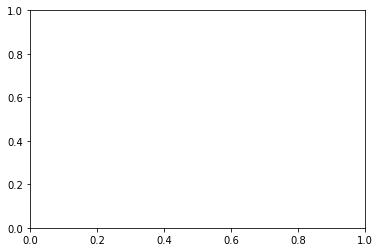

In [135]:
jacc = jhistory.history['acc']
jval_acc = jhistory.history['val_acc']
jloss = jhistory.history['loss']
jval_loss = jhistory.history['val_loss']

jepochs = range(1, len(acc) + 1)

plt.plot(jepochs, jloss, label='Training loss')
plt.plot(jepochs, jval_loss, label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
jacc_values = jhistory_dict['acc']
jval_acc_values = jhistory_dict['val_acc']

plt.plot(jepochs, jacc, label='Training acc')
plt.plot(jepochs, jval_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()